# Criando uma apresentação executiva
- Vamos usar a base de vendas do kaggle disponível em:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

### O que queremos responder?
- Como foi a **venda** nesse período?
- Qual foi a **categoria mais vendida**?
- Qual foi o **item mais vendido**?


### 1. Importando e visualizando a base
- Base: "Criando uma apresentação executiva.csv"

In [266]:
# Importando as bibliotecas e a base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
base = pd.read_csv("Criando uma apresentação executiva.csv")

### 2. Entendendo e tratando a base

In [267]:
# Visualizando as informações da base
base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**Apenas código postal possui valores nulos, podemos visualizar quais linhas não possuem esse valor**

In [268]:
# Verificando os registros com Postal Code vazio
base = base.rename(columns={'Postal Code': 'PostalCode'})
base.loc[base.PostalCode.isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**Todos os registros sem código postal são da cidade de Burlington, em Vermont. Será que algum registro dessa cidade possui código postal?**

In [269]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code
base[(base.City == 'Burlington') & (base.State == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**Podemos ir diretamente no google para buscar essa informação**

![13.%20Criando%20uma%20apresentac%CC%A7a%CC%83o%20executiva.png](attachment:13.%20Criando%20uma%20apresentac%CC%A7a%CC%83o%20executiva.png)

In [270]:
# Atualizando essa informação
base.loc[(base.PostalCode).isnull(), 'PostalCode'] = 5401

In [271]:
# Verificando se ainda existe algum valor nulo
base.loc[(base.PostalCode).isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [272]:
# Visualizando novamente as informações da base
base[(base.City == 'Burlington')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales
683,684,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,685,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1008,1009,US-2018-106705,26/12/2018,01/01/2019,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1038,1039,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10000203,Office Supplies,Art,Newell 336,23.968
1039,1040,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728
1393,1394,CA-2018-124828,03/07/2018,04/07/2018,First Class,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2928,2929,US-2018-120390,19/10/2018,26/10/2018,Standard Class,TH-21550,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,5066,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,TEC-AC-10002001,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,5067,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682


### 3. <font color="blue"> Como foi a venda nesse período? </font>
Aqui temos 2 questões que precisamos pensar:
- **Quais <font color="blue">colunas</font> vamos usar?**
    - Podemos verificar a venda na coluna "Sales""
    - O período nós podemos usar a coluna "Order Date", mas precisamos entender melhor essa coluna
- **Qual o <font color="blue">período</font> queremos exibir?**

In [273]:
base.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  PostalCode     9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [274]:
# Para entender a data, podemos ver de qual período estamos falando
base['Order Date'].min()

'01/01/2018'

**<font color="red">CUIDADO:</font> Se a coluna de data estiver como texto e não como data, a ordenação vai ser pelo texto e não pela data!**

**Podemos converter uma coluna para data usando o to_datetime do pandas**
<br><br>
base["coluna"] = pd.**to_datetime(**base["coluna"]**)**
- No datetime, caso tenha apenas a data, a hora ficaria como 00:00:00
- Se quisermos considerar apenas a data, podemos usar o **.date** da biblioteca **datetime**

In [275]:
import datetime as dt

In [276]:
# Convertendo as colunas de data para datetime
base["Order Date"] = pd.to_datetime(base["Order Date"])
base["Ship Date"] = pd.to_datetime(base["Ship Date"])

In [277]:
# Para entender a data, podemos ver de qual período estamos falando
base['Order Date'].min()

Timestamp('2015-01-02 00:00:00')

In [278]:
# Buscando o máximo da data
base['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

- Estamos falando de 4 anos de análise, começando em jan/2015 e indo até dez/2018

#### Como estamos falando de um período grande de anos, podemos começar a visualização pelos anos
- Para isso, podemos usar o **.year** da biblioteca datetime para criar uma nova coluna apenas com o ano dessa base

# Venda por ano

In [279]:
# Criando uma coluna com o ano
base['Ano'] = base['Order Date'].dt.year
base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016


#### Lembram do groupby()?

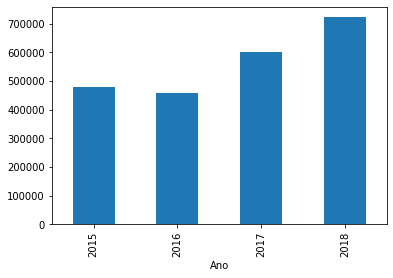

In [280]:
# Usando essa coluna no group by e criando um plot de barras

base.groupby(["Ano"])["Sales"].sum().plot.bar();


## Melhorando o visual desse gráfico
- Como já vimos no último tópico, podemos melhorar muito a visualização desse gráfico. Vamos fazer isso!
- Primeiramente vamos traçar um gráfico usando o que aprendemos de matplotlib
    - https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py
    - Sugestão de cor: `#84ba5b`

In [281]:
import matplotlib.pyplot as plt

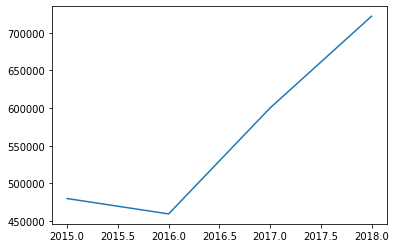

In [282]:
# Criando um gráfico com o matplotlib usando o groupby

fig, ax = plt.subplots()

ax.plot(base.groupby(["Ano"])["Sales"].sum().index , base.groupby(["Ano"])["Sales"].sum().values , label="Pedidos")

plt.show()

**Adicionando o título e melhorando os textos do eixo**
- Vamos adicionar o título e melhorar o eixo x
    - O `.set_title` vai permitir colocar título e ajustar os parâmetros desse títulos
        - fontsize: Tamanho da fonte
        - fontweight: Espessura da fonte
        - color: Cor da fonte
    - O `xaxis.set_ticks` vai definir os valores mostrados no eixo x
    - O `.tick_params(axis='x')` vai ajustar o parâmetro do eixo x
        - labelsize: tamanho do label

In [283]:
set(base.Ano)

{2015, 2016, 2017, 2018}

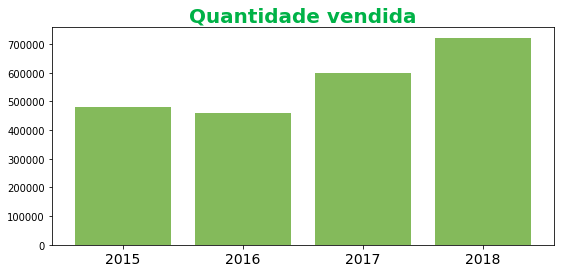

In [284]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )


ax.set_title('Quantidade vendida', fontsize = ('20'), fontweight='bold', color='#00b247')
ax.xaxis.set_ticks([2015,2016,2017,2018])
ax.tick_params(axis='x',labelsize=14)


plt.show()

**Adicionando o rótulo de dados**
- Para adicionar rótulo de dados, vamos usar o `.annotate` como vimos na última aula

In [285]:
import numpy as np

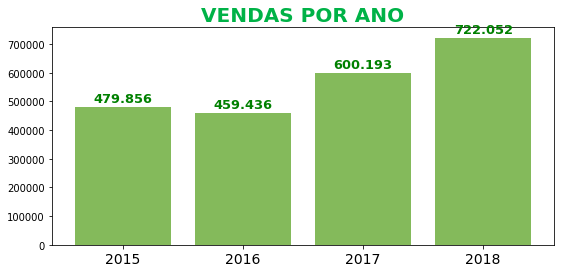

In [286]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',','.'),(soma_ano.index[i], soma_ano.values[i]),
                ha="center",
                xytext=(0,15),
                textcoords="offset points",
                fontsize=13,
                fontweight='bold',
                va="top",
                color="green"
                )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

plt.show()

**Melhorando a visualização do gráfico**
- Para o eixo y, podemos fazer igual fizemos para o eixo x
    - Com o `.set_yticks` vamos ajustar os valores do eixo y
    - O `.yaxis.set_visible(False)` permite retirar os valores do eixo y, tornando nosso visual mais claro
- Já para retirar as bordas do gráfico, basta usar o `.spines['top'].set_visible(False)`

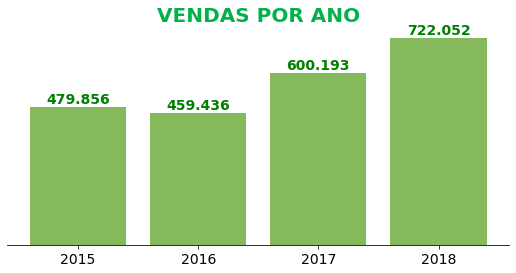

In [287]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )

ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**Como resultado final, teremos o gráfico abaixo**

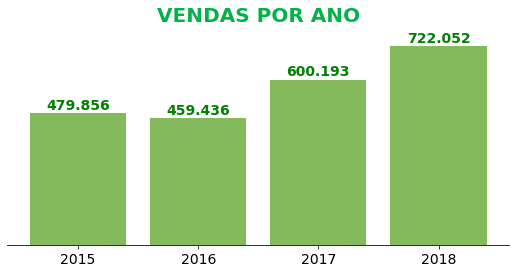

In [288]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )
    
ax.set_yticks(np.array([0,790000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Venda por mês

#### Também podemos mostrar essa visão por meses
- Para isso, podemos usar o **.month** da biblioteca datetime para criar uma nova coluna apenas com o mês dessa base

In [289]:
# Criando uma coluna com o mês
base['mes'] = base['Order Date'].dt.month
base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11


In [290]:
# Fazendo o groupby agora por mês e ano
base.groupby(["Ano","mes"])["Sales"].sum()

Ano   mes
2015  1      28828.2540
      2      12588.4840
      3      54027.6920
      4      24710.0160
      5      29520.4900
      6      29181.3346
      7      35194.5580
      8      37349.2655
      9      65956.3998
      10     34561.9470
      11     64369.4565
      12     63568.3107
2016  1      29347.3864
      2      20728.3520
      3      34489.6776
      4      38056.9685
      5      30761.5585
      6      28515.9082
      7      28573.3100
      8      49076.9300
      9      65352.9970
      10     31631.8890
      11     50009.1450
      12     52891.8832
2017  1      38048.1840
      2      48907.5900
      3      48990.1410
      4      42368.0480
      5      64836.2518
      6      37424.6810
      7      41761.9430
      8      45766.8144
      9      40692.3063
      10     52156.9580
      11     66392.5470
      12     72847.0855
2018  1      59767.0910
      2      48928.8334
      3      74748.6238
      4      37849.2156
      5      40882.4464
      

In [291]:
# Verificando os valores gerados
soma_mes = base.groupby(["Ano","mes"])["Sales"].sum()

**Com o <font color="blue">.reset_index()</font> conseguimos transformar os índices em colunas e então aplicar todas as propriedades que conhecemos para o DataFrame**

In [292]:
# Vamos transformar os índices em colunas
soma_mes = soma_mes.reset_index()

In [293]:
# Visualizando a base novamente
soma_mes

,Ano,mes,Sales
0,2015,1,28828.2540
1,2015,2,12588.4840
2,2015,3,54027.6920
3,2015,4,24710.0160
4,2015,5,29520.4900
5,2015,6,29181.3346
6,2015,7,35194.5580
7,2015,8,37349.2655
8,2015,9,65956.3998
9,2015,10,34561.9470


**Vamos usar o gráfico que fizemos na aula anterior para ir criando esse gráfico**

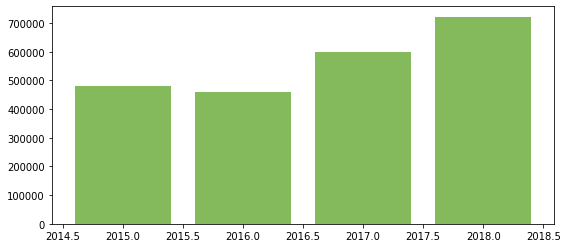

In [294]:
# Criando o gráfico de mês com o matplotlib
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

plt.show()

**Agora vamos adicionar a barra do ano de 2016**
- Vamos adicionar um gráfico de barras com os dados de 2016

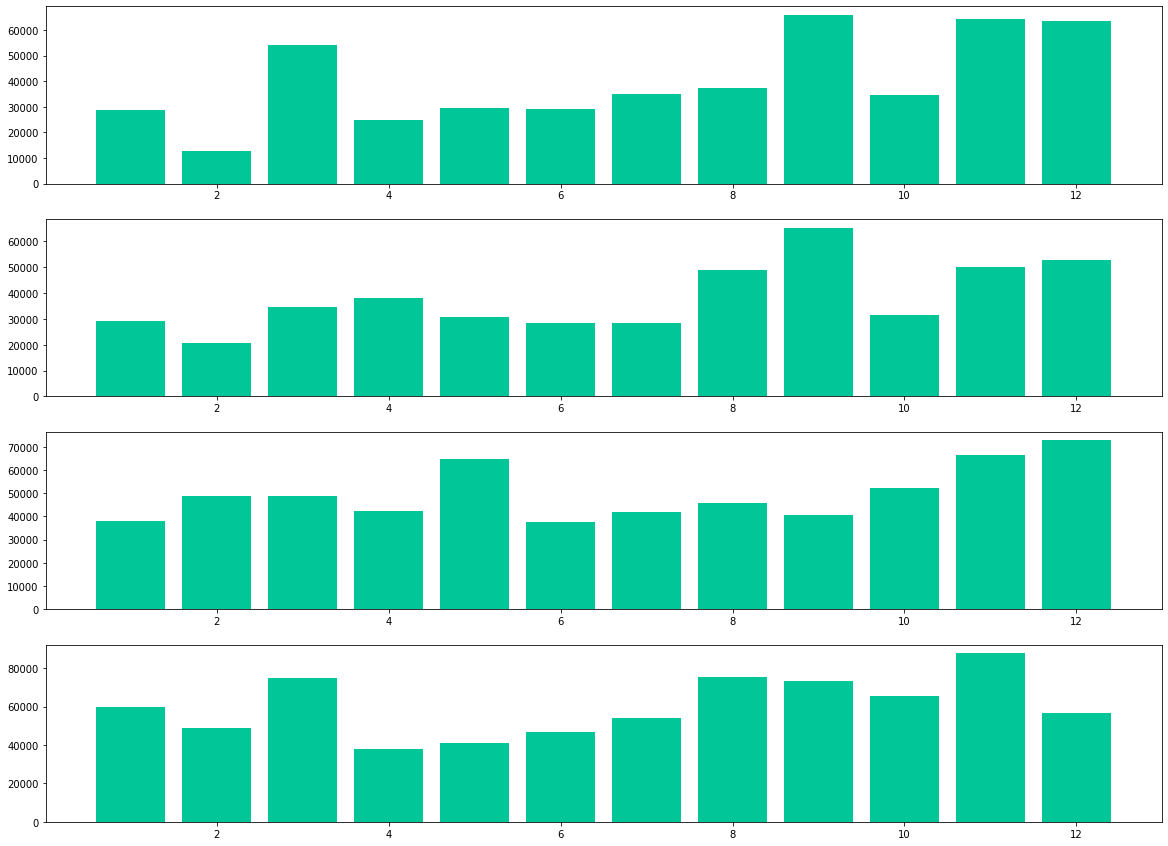

In [295]:
fig,ax = plt.subplots(nrows=4,ncols=1,
            figsize = (20,15) # Tamanho da figura
        )

ax[0].bar(soma_mes[soma_mes.Ano == 2015].mes.values,soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015 # Label dos dados
      )

ax[1].bar(soma_mes[soma_mes.Ano == 2016].mes.values,soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00c698", # Cor das barras
       label=2015 # Label dos dados
      )

ax[2].bar(soma_mes[soma_mes.Ano == 2017].mes.values,soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#00c698", # Cor das barras
       label=2015 # Label dos dados
      )

ax[3].bar(soma_mes[soma_mes.Ano == 2018].mes.values,soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#00c698", # Cor das barras
       label=2015 # Label dos dados
      )

plt.show()

**E então, deslocar as barras**
- Para isso, vamos usar o mesmo raciocínio do width que usamos na aula anterior
    - Para diferenciar os dados, também podemos usar o `label` para informar qual é cada um dos gráficos

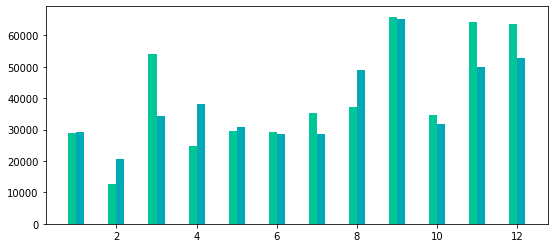

In [296]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

wid = 0.2

ax.bar(soma_mes[soma_mes.Ano == 2015].mes.values-wid/2,
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698",
       label=2015,
       width = wid
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5",
       label=2016,
       width = wid
      )

plt.show()

**Podemos agora adicionar todas as barras**

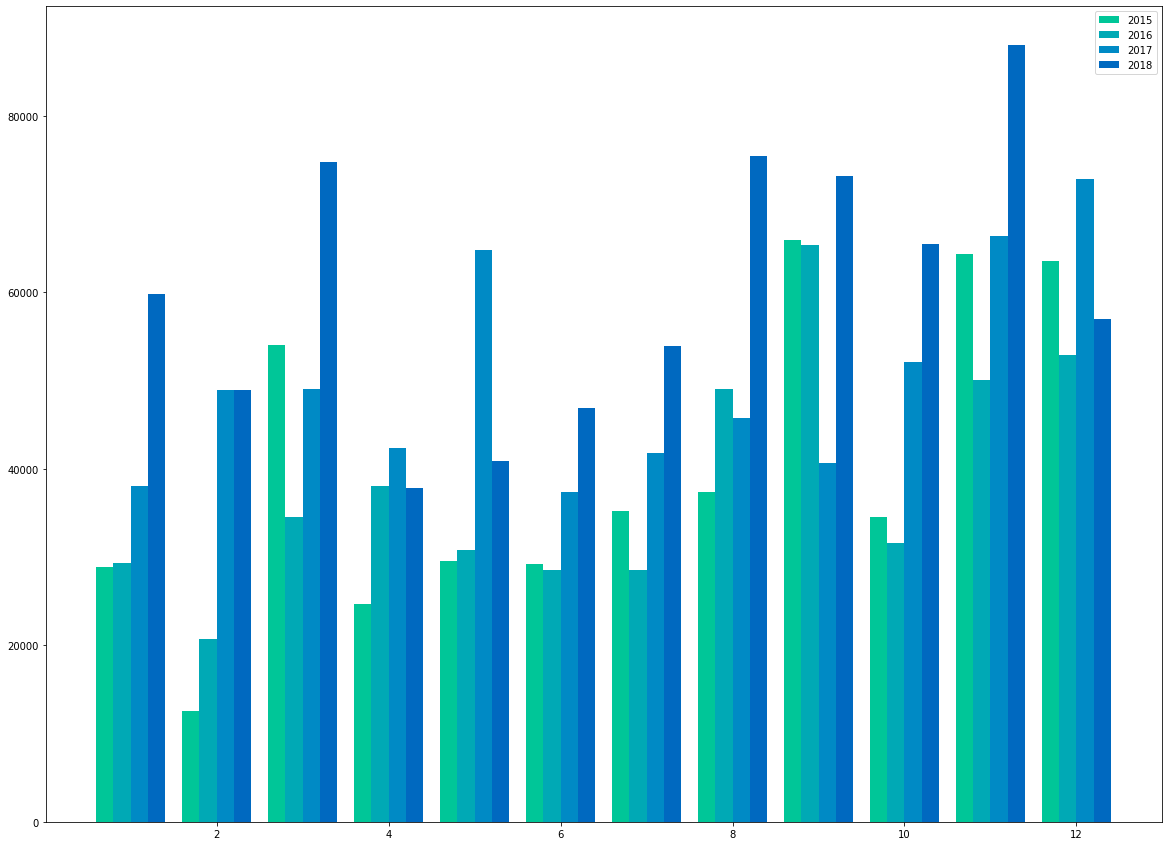

In [297]:
fig,ax = plt.subplots(
            figsize = (20,15) # Tamanho da figura
        )

### VAMOS AJUSTAR ESSA PARTE DO CÓDIGO ADICIONANDO AS PARTES DO TAMANHO DAS BARRAS
wid = 0.2

ax.bar(soma_mes[soma_mes.Ano == 2015].mes.values-wid-wid/2, # <- DESLOCANDO A BARRA PARA A ESQUERDA
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].mes.values-wid/2, # <- DESLOCANDO A BARRA PARA A DIREITA
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

ax.bar(soma_mes[soma_mes.Ano == 2017].mes.values+wid/2, # <- DESLOCANDO A BARRA PARA A DIREITA
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )

ax.bar(soma_mes[soma_mes.Ano == 2018].mes.values+wid+wid/2, # <- DESLOCANDO A BARRA PARA A DIREITA
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )


ax.legend()

plt.show()

**E vamos colocar rótulo apenas em 2018 para não poluir muito o gráfico**

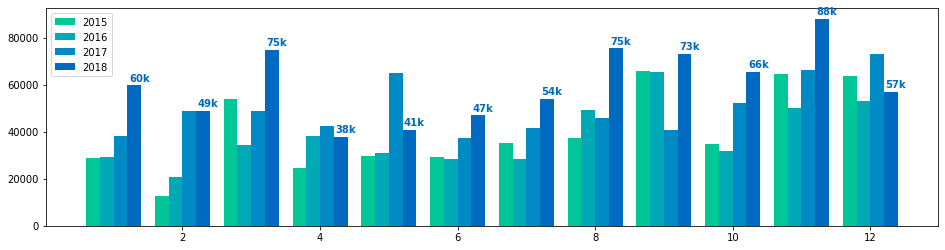

In [298]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].mes.values-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].mes.values+wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].mes.values+wid+wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )

for i in range(0, 12):
  ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # formatando o número
                 (soma_mes[soma_mes.Ano == 2018].mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]),# colocando a posição do elemento 
                              ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos # colocando a posição do elemento 

                )

ax.legend()
    
plt.show()

**Melhorando o visual retirando as bordas e ajustando o texto do eixo x**

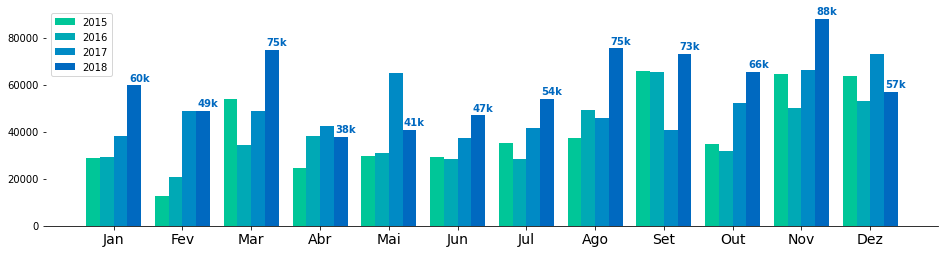

In [299]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    
ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

plt.show()

**Como resultado final, teremos o gráfico abaixo**

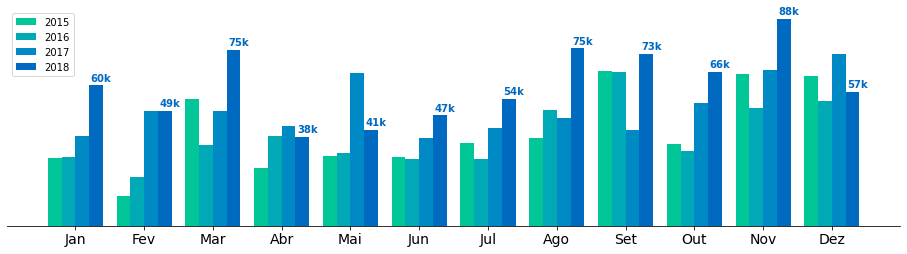

In [300]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x
    
plt.show()

### 4. <font color="blue"> Qual foi a categoria mais vendida? </font>
Precisamos primeiro entender a informação de categoria

In [301]:
# Podemos fazer um groupby da categoria
base.head()
base.groupby("Category")["Sales"].sum()

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

**Como estamos falando de 4 anos diferentes, seria interessante entender como foram essas categorias em cada um dos anos**

In [302]:
# Agrupando por ano e categoria
base.groupby(["Ano","Category"])["Sales"].sum()

Ano   Category       
2015  Furniture          156477.8811
      Office Supplies    149512.8200
      Technology         173865.5070
2016  Furniture          164053.8674
      Office Supplies    133124.4070
      Technology         162257.7310
2017  Furniture          195813.0400
      Office Supplies    182417.5660
      Technology         221961.9440
2018  Furniture          212313.7872
      Office Supplies    240367.5410
      Technology         269370.6910
Name: Sales, dtype: float64

**Uma forma de visualizar melhor essas informações é fazer um gráfico de barras com esses dados, bem semelhante ao que fizemos acima**

In [303]:
# Criando agora a base de categorias como fizemos anteriormente
categoria = base.groupby(["Ano","Category"])["Sales"].sum()
categoria = categoria.reset_index()



In [304]:
# Visualizando 
categoria

,Ano,Category,Sales
0,2015,Furniture,156477.8811
1,2015,Office Supplies,149512.8200
2,2015,Technology,173865.5070
3,2016,Furniture,164053.8674
4,2016,Office Supplies,133124.4070
5,2016,Technology,162257.7310
6,2017,Furniture,195813.0400
7,2017,Office Supplies,182417.5660
8,2017,Technology,221961.9440
9,2018,Furniture,212313.7872


**Utilizando a mesma lógica do gráfico anterior**

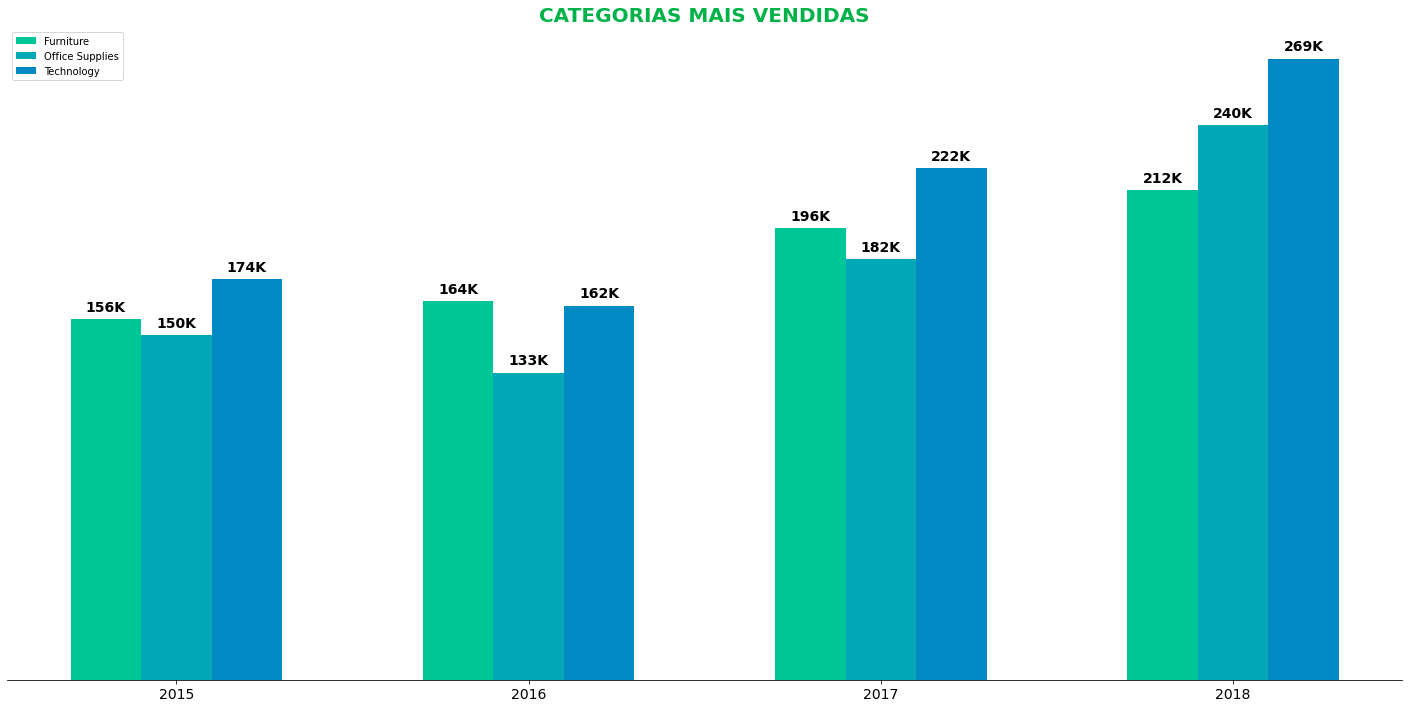

In [305]:
# Vamos utilizar o mesmo código do gráfico anterior para exibir por categorias
fig,ax = plt.subplots(
            figsize = (25, 12) # Tamanho da figura
        )


wid = 0.2

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values-wid, # Como temos 3 colunas, vamos deslocar a largura da coluna inteira
       categoria[categoria.Category == 'Furniture'].Sales.values,
       color="#00c698", 
       label='Furniture', # As legendas agora serão as categorias
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values, 
       categoria[categoria.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", 
       label='Office Supplies', 
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Technology'].Ano.values+wid, 
       categoria[categoria.Category == 'Technology'].Sales.values,
       color="#008ac5", 
       label='Technology', 
       width=wid
      )

ax.set_title("CATEGORIAS MAIS VENDIDAS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )


for i in np.arange(0,4):
    ax.annotate('{:,.0f}K'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]/1000), # formatando o número
                 (categoria[categoria.Category == 'Furniture'].Ano.values[i]-wid , categoria[categoria.Category == 'Furniture'].Sales.values[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,8), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=14, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                
    )


for i in np.arange(0,4):
    ax.annotate('{:,.0f}K'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]/1000), # formatando o número
                 (categoria[categoria.Category == 'Office Supplies'].Ano.values[i], categoria[categoria.Category == 'Office Supplies'].Sales.values[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,8), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=14, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                
    )


for i in np.arange(0,4):
    ax.annotate('{:,.0f}K'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]/1000), # formatando o número
                 (categoria[categoria.Category == 'Technology'].Ano.values[i] + wid , categoria[categoria.Category == 'Technology'].Sales.values[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,8), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=14, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                
    )    

ax.legend()
ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x



ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**Como resultado final, teremos o gráfico abaixo**

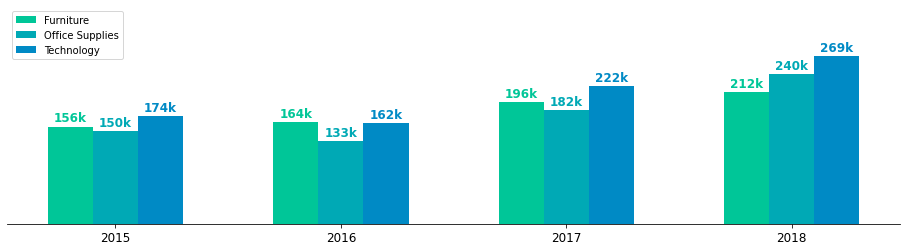

In [306]:
fig,ax = plt.subplots(
            figsize = (16,4)
        )

wid = 0.2 

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values-wid, # Como temos 3 colunas, vamos deslocar a largura da coluna inteira
       categoria[categoria.Category == 'Furniture'].Sales.values,
       color="#00c698", 
       label='Furniture', # As legendas agora serão as categorias
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values, 
       categoria[categoria.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", 
       label='Office Supplies', 
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Technology'].Ano.values+wid, 
       categoria[categoria.Category == 'Technology'].Sales.values,
       color="#008ac5", 
       label='Technology', 
       width=wid
      )

ax.legend()

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Furniture'].Ano.values[i]-wid,categoria[categoria.Category == 'Furniture'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c698")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Office Supplies'].Ano.values[i],categoria[categoria.Category == 'Office Supplies'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00a9b5")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Technology'].Ano.values[i]+wid,categoria[categoria.Category == 'Technology'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")   
    
ax.set_yticks(np.array([0,350000]))
ax.yaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2015,2019)) 
ax.tick_params(axis='x',labelsize=12) 

plt.show()

### 4. <font color="blue"> Qual o item mais vendido? </font>
Vamos seguir exatamente a mesma lógica da categoria

**Podemos fazer a tabela considerando esses top itens**
- Para pegar uma base, podemos usar o `.head()` que já conhecemos
- Podemos também usar o `.sort_values()` para definirmos se a base será crescente ou descrescente

In [307]:
# Podemos fazer um groupby do item
produtos = base.groupby('Product Name')['Sales'].sum()
produtos = produtos.reset_index()
produtos = produtos.sort_values('Sales', ascending=False)
produtos.head(10)


,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


**Uma forma de resolver a quantidade de ítens seria fazer apenas para os top 10 ítens**

In [308]:
# Os top 10 itens são
top_itens = produtos.head(10)

In [309]:
# Definindo o top n itens
n = 10
top_itens = produtos.head(n)
top_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


**Vamos traçar um gráfico de barras horizontais para mostrar o top 10 itens**
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
- Podemos usar o `ax.invert_yaxis()` para inverter o eixo y

**Agora agrupando por ítem e ano**

In [310]:
top_itens['Sales'].values

array([61599.824, 27453.384, 22638.48 , 21870.576, 19823.479, 19024.5  ,
       18839.686, 18374.895, 17965.068, 17030.312])

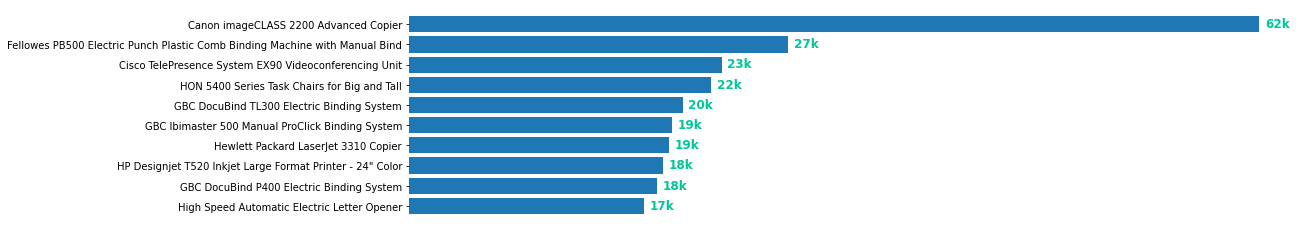

In [311]:
fig,ax = plt.subplots(
            figsize = (16,4)
        )

ax.barh(top_itens['Product Name'].values, top_itens['Sales'].values, align='center')
ax.invert_yaxis()

for i in np.arange(0,n):
    ax.annotate('{:,.0f}k'.format(top_itens['Sales'].values[i]/1000), 
                (top_itens['Sales'].values[i], i ), 
                ha="center", va="top", xytext=(18,7), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c698")


ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False) 

plt.show()

In [312]:
# Podemos fazer um groupby de item e ano
itens_ano = base.groupby(['Product Name', 'Ano'])['Sales'].sum()
itens_ano = itens_ano.reset_index()


In [313]:
# Para visualizar algum item dos top itens
itens_ano[itens_ano["Product Name"] == top_itens.iloc[2, 0]]

,Product Name,Ano,Sales
1270,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.48


**Como vamos criar esse gráfico? Como saber quais itens não aparecem em todos os anos?**

### Juntando bases no pandas

**O <font color='blue'>.merge()</font> irá juntar duas bases**
- Para isso, devemos passar:
    - base 1
    - base 2
    - how: forma que iremos fazer essa junção das bases
        - inner: o que tiver em comum entre as 2 bases (base 1 E base 2)
        - outer: tudo o que tiver nas 2 bases (base 1 OU base 2)
        - left: tudo o que tem na PRIMEIRA base, juntando com o que tiver na segunda
        - right: tudo o que tem na SEGUNDA base, juntando com o que tiver na primeira
    - on: colunar que vamos usar para fazer a junção da base

In [314]:
# Criando 2 dataframes
dic1 = {
    "nomes": ['Nome1','Nome2','Nome3'],
    "valores": [1,2,3]
}

base_dic1 = pd.DataFrame(dic1)

dic2 = {
    "nomes": ['Nome1','Nome2','Nome4'],
    "valores": [9,8,7]
}

base_dic2 = pd.DataFrame(dic2)

In [315]:
base_merge = pd.merge(
    base_dic1, # <- primeira base
    base_dic2, # <- segunda base
    how='outer', # <- tipo de junção que vamos fazer
    on="nomes" # <- coluna que vamos usar para fazer essa junção das bases
) 

display(base_merge)

,nomes,valores_x,valores_y
0,Nome1,1.0,9.0
1,Nome2,2.0,8.0
2,Nome3,3.0,NaN
3,Nome4,NaN,7.0


In [316]:
# Temos a nossa base de top itens
top_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


**Como podemos cruzar a base com todos os anos de 2015 a 2018?**
- Basta transformar as datas em um DataFrame e usar o merge para fazer essa união

In [317]:
df_datas = pd.DataFrame([2018,2017,2016,2015])
df_datas.columns = ['Ano']
df_datas

,Ano
0,2018
1,2017
2,2016
3,2015


**Só que pra conseguir unir as bases, precisamos ter uma coluna em comum entre elas**
- Então podemos, nas duas bases, criar uma coluna chamada `uniao` (ou qualquer outro nome) com o mesmo valor

In [318]:
produtos['uniao'] = 'unir'
df_datas['uniao'] = 'unir'


**Agora que temos uma coluna que conseguimos relacionar, podemos fazer o merge das bases**

In [320]:
produto_ano = pd.merge(
    top_itens, # <- primeira base
    df_datas, # <- segunda base
    how='outer', # <- tipo de junção que vamos fazer
    on='uniao' # <- coluna que vamos usar para fazer essa junção das bases
) 

produto_ano.head()

KeyError: ignored

#### Agora podemos voltar para a base itens_ano e fazer a junção com essa base acima

In [ ]:
display(itens_ano)

In [ ]:
itens_ano_grafico = pd.merge(
    produto_ano,
    itens_ano,
    how='left',
    on=['Product Name','Ano']
)
        
itens_ano_grafico.head()

In [ ]:
itens_ano_grafico[itens_ano_grafico.Ano == 2018]['Sales_y'].values

**Agora podemos usar esses dados para traçar o gráfico**

In [ ]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig,ax = plt.subplots(
            figsize = (16,12)
        )

hgt = 0.2
qtd_itens = len(top_itens)

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2,
        itens_ano_grafico[itens_ano_grafico.Ano == 2018]['Sales_y'].values, 
        align='center', height = hgt, label = 2018)
ax.barh(np.arange(0,qtd_itens)-hgt/2,
        itens_ano_grafico[itens_ano_grafico.Ano == 2017]['Sales_y'].values, 
        align='center', height = hgt, label = 2017)
ax.barh(np.arange(0,qtd_itens)+hgt/2,
        itens_ano_grafico[itens_ano_grafico.Ano == 2016]['Sales_y'].values, 
        align='center', height = hgt, label = 2016)
ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2,
        itens_ano_grafico[itens_ano_grafico.Ano == 2015]['Sales_y'].values, 
        align='center', height = hgt, label = 2015)


for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i],i-hgt-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")

ax.yaxis.set_ticks(np.arange(0,qtd_itens)) 
ax.set_yticklabels(top_itens["Product Name"]) 
ax.tick_params(axis='y',labelsize=10) 

ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend()
ax.invert_yaxis()
plt.show()

**Como resultado final, teremos o gráfico abaixo**

In [ ]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig,ax = plt.subplots(
            figsize = (16,12)
        )

hgt = 0.2

qtd_itens = len(top_itens)

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values, # Valores de x 
        align='center',
        height=hgt, # Comprimento do gráfico
        label=2018,
        color="#0069c0"
       )
ax.barh(np.arange(0,qtd_itens)-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2017].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2017,color="#008ac5")

ax.barh(np.arange(0,qtd_itens)+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2016].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2016,color="#00a9b5")

ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2015].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2015,color="#00c698")

ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)
ax.legend()

for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i],i-hgt-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")
    
ax.yaxis.set_ticks(np.arange(0,qtd_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_itens["Product Name"]) # Colocando rótulo no meu eixo
ax.tick_params(axis='y',labelsize=10) # Melhorando o visual do eixo x

ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

# Resumindo as perguntas

In [ ]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )
    
ax.set_yticks(np.array([0,790000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [ ]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.set_title("VENDAS POR MÊS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
              # Cor da fonte
            )

ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x
    
plt.show()

In [ ]:
fig,ax = plt.subplots(
            figsize = (16,4)
        )

wid = 0.2 

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values-wid, # Como temos 3 colunas, vamos deslocar a largura da coluna inteira
       categoria[categoria.Category == 'Furniture'].Sales.values,
       color="#00c698", 
       label='Furniture', # As legendas agora serão as categorias
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values, 
       categoria[categoria.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", 
       label='Office Supplies', 
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Technology'].Ano.values+wid, 
       categoria[categoria.Category == 'Technology'].Sales.values,
       color="#008ac5", 
       label='Technology', 
       width=wid
      )
ax.set_title("VENDAS POR CATEGORIA", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
              # Cor da fonte
            )

ax.legend()

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Furniture'].Ano.values[i]-wid,categoria[categoria.Category == 'Furniture'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c698")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Office Supplies'].Ano.values[i],categoria[categoria.Category == 'Office Supplies'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00a9b5")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Technology'].Ano.values[i]+wid,categoria[categoria.Category == 'Technology'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")   
    
ax.set_yticks(np.array([0,350000]))
ax.yaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2015,2019)) 
ax.tick_params(axis='x',labelsize=12) 

plt.show()

In [ ]:
fig,ax = plt.subplots(
            figsize = (16,4)
        )

ax.barh(top_itens['Product Name'].values, top_itens['Sales'].values, align='center')
ax.invert_yaxis()

for i in np.arange(0,n):
    ax.annotate('{:,.0f}k'.format(top_itens['Sales'].values[i]/1000), 
                (top_itens['Sales'].values[i], i ), 
                ha="center", va="top", xytext=(18,7), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c698")

ax.set_title("TOP ITENS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
              # Cor da fonte
            )

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False) 

plt.show()

In [ ]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig,ax = plt.subplots(
            figsize = (16,12)
        )

hgt = 0.2

qtd_itens = len(top_itens)

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values, # Valores de x 
        align='center',
        height=hgt, # Comprimento do gráfico
        label=2018,
        color="#0069c0"
       )
ax.barh(np.arange(0,qtd_itens)-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2017].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2017,color="#008ac5")

ax.barh(np.arange(0,qtd_itens)+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2016].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2016,color="#00a9b5")

ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2015].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2015,color="#00c698")

ax.set_title("TOP ITENS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
              # Cor da fonte
            )

ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)
ax.legend()

for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i],i-hgt-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")
    
ax.yaxis.set_ticks(np.arange(0,qtd_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_itens["Product Name"]) # Colocando rótulo no meu eixo
ax.tick_params(axis='y',labelsize=10) # Melhorando o visual do eixo x

ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

### EXTRA: E se quisermos outros tipos de gráficos?